# **IMPORTANDO LIBRERIAS**

In [5]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [6]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# **CARGANDO EL DATASET**

In [8]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,103894,103895,103896,103897,103898,103899,103900,103901,103902,103903
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,103894,103895,103896,103897,103898,103899,103900,103901,103902,103903
id,70172,5047,110028,24026,119299,111157,82113,96462,79485,65725,...,86549,66030,71445,102203,60666,94171,73097,68825,54173,62567
Gender,Male,Male,Female,Female,Male,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Male,Female,Male,Male,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,...,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer
Age,13,25,26,25,61,26,47,52,41,20,...,26,24,57,60,50,23,49,30,22,27
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business,Eco,Eco,Business,Business,Eco,...,Business,Eco,Eco,Business,Eco,Eco,Business,Business,Eco,Business
Flight Distance,460,235,1142,562,214,1180,1276,2035,853,1061,...,712,1055,867,1599,1620,192,2347,1995,1000,1723
Inflight wifi service,3,3,2,2,3,3,2,4,1,3,...,4,1,4,5,3,2,4,1,1,1
Departure/Arrival time convenient,4,2,2,5,3,4,4,3,2,3,...,4,1,5,5,1,1,4,1,1,3


# **DESCRIPCIÓN DE LAS CARACTERÍSTICAS**

**Gender:** Sexo. (Femenino, Masculino).

**Customer Type**: Tipo de cliente (Cliente leal, cliente desleal).

**Age**: Edad.

**Type of Travel**: Propósito del vuelo (Viaje personal, Viaje de negocios).

**Class**: Clase (Business, Eco, Eco Plus).

**Flight Distance**: La distancia de vuelo de este viaje.

**Inflight wifi service**: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5).

**Departure/Arrival time convenient**: Nivel de satisfacción de la comodidad de la hora de salida/llegada.

**Ease of Online booking**: Nivel de satisfacción de la reserva en línea.

**Gate location:** Nivel de satisfacción con la ubicación de la puerta.

**Food and drink:** Nivel de satisfacción con la comida y la bebida.

**Online boarding:** Nivel de satisfacción del embarque en línea.

**Seat comfort:** Nivel de satisfacción de la comodidad de los asientos.

**Inflight entertainment:** Nivel de satisfacción del entretenimiento a bordo.

**On-board service:** Nivel de satisfacción del servicio a bordo.

**Leg room service:** Nivel de satisfacción del espacio entre los asientos.

**Baggage handling:** Grado de satisfacción del servicio de equipajes.

**Checkin service:** Nivel de satisfacción del servicio de facturación.

**Inflight service:** Nivel de satisfacción del servicio a bordo.

**Cleanliness:** Nivel de satisfacción de la limpieza.

**Departure Delay in Minutes:** Minutos de retraso en la salida.

**Arrival Delay in Minutes:** Minutos de retraso en la llegada.

**satisfaction:** Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción).

# **EDA**

# **- CONOCIMIENTO BÁSICO DE LOS DATOS**

In [ ]:
print("Dataset shape is: ",df.shape)

Dataset shape is:  (103904, 25)


In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [ ]:
#TIPOS DE DATOS
print("Data Types of features of Dataset is:")
print(df.dtypes)

Data Types of features of Dataset is:
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness      

Hay 5 variables categóricas(Gender, Customer type,Type of travel, Class y Satisfaction) y el resto son numéricas.

In [9]:
#MISSING VALUES
pd.concat([df.isnull().sum(), df.isnull().mean() * 100], axis=1, keys=['Cantidad de Nulos', 'Porcentaje'])

,Cantidad de Nulos,Porcentaje
Unnamed: 0,0,0.000000
id,0,0.000000
Gender,0,0.000000
Customer Type,0,0.000000
Age,0,0.000000
Type of Travel,0,0.000000
Class,0,0.000000
Flight Distance,0,0.000000
Inflight wifi service,0,0.000000
Departure/Arrival time convenient,0,0.000000


Sólo Arrival Delay in minutes tiene nulos y son muy pocos.Los imputo con la mediana.

In [10]:
median_delay = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

In [11]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
# Análisis estadístico básico
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
#DUPLICADOS
print(f"Duplicates in Dataset is:{df.duplicated().sum()},({100*df.duplicated().sum()/len(df)})%")

Duplicates in Dataset is:0,(0.0)%


In [ ]:
#CARDINALIDAD DE LAS VARIABLES (número de registros unicos)
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

**-TARGET**

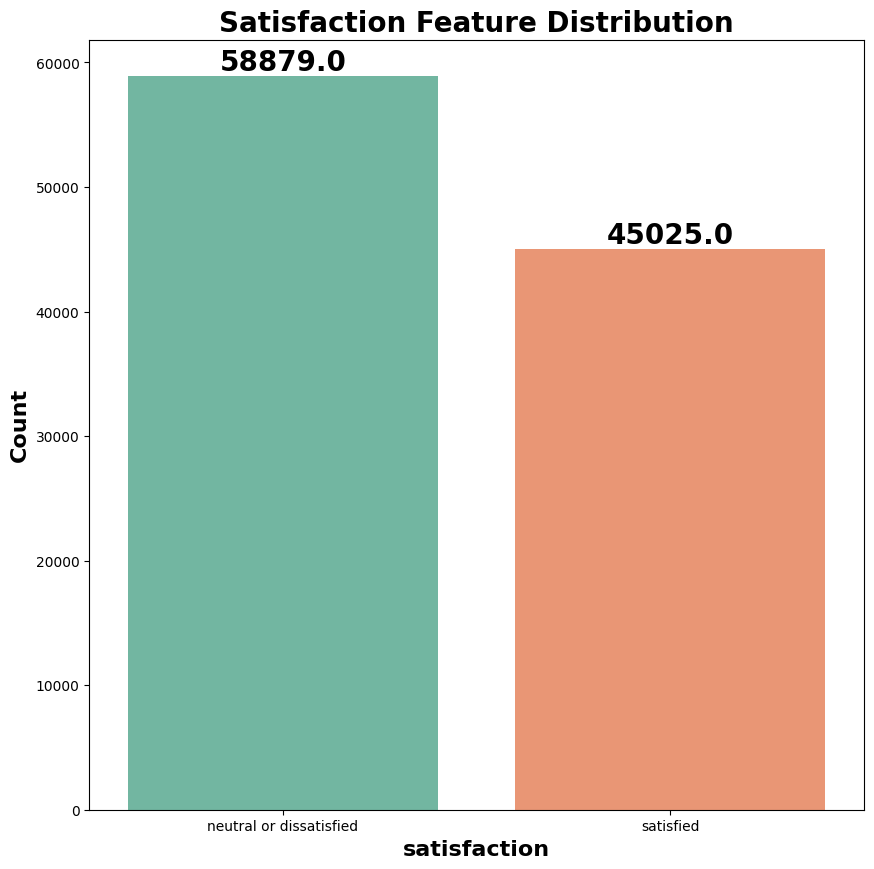

In [ ]:
#TARGET satisfaction
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x="satisfaction", palette="Set2")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=20, fontweight='black', color='black', xytext=(0, 10), textcoords='offset points')
plt.title("Satisfaction Feature Distribution", fontsize=20, fontweight='bold')
plt.xlabel("satisfaction", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
porcentaje_satisfaccion = df['satisfaction'].value_counts(normalize=True) * 100
porcentaje_satisfaccion

neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64

Datos levemente desbalanceados, probablemente utilicemos validación cruzada estratificada.

In [13]:
# Selección de variables numéricas
variables_numericas = df.select_dtypes(include=['number'])  # Esto incluirá todas las columnas numéricas

# Selección de variables categóricas
variables_categoricas = df.select_dtypes(include=['object'])  # Esto incluirá todas las columnas de tipo 'object'

In [ ]:
variables_numericas

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [ ]:
variables_categoricas

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


- **GRÁFICAS VARIABLES NUMÉRICAS**

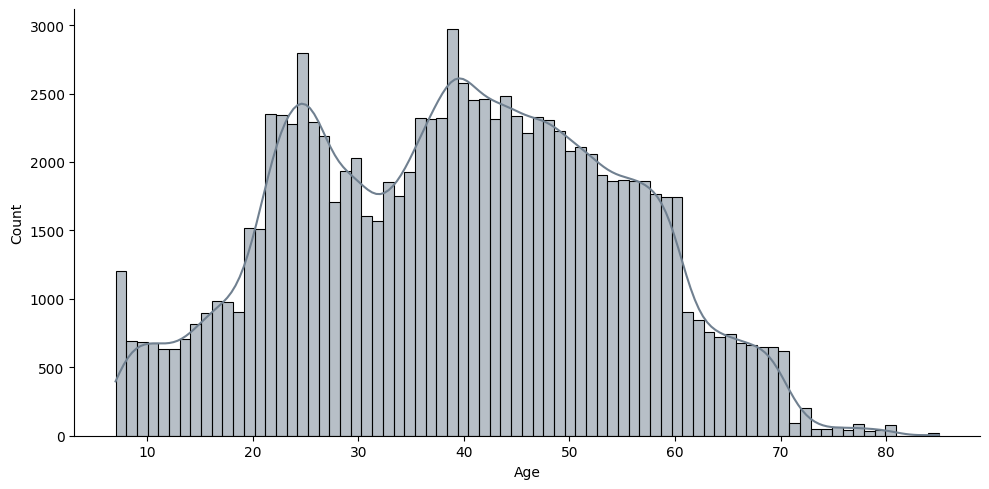

In [ ]:
#AGE
sns.displot(df['Age'],kde=True,aspect=2,color='slategray')

Se viaja más entre los 23-27 y entre 35-48.  
Podemos crear otra variable Age Group.

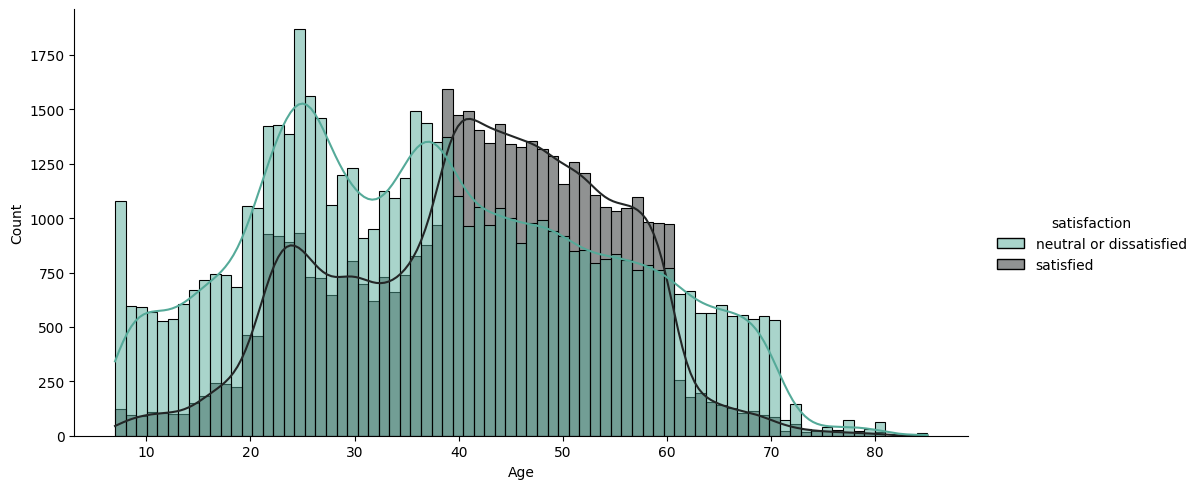

In [ ]:
#AGE-SATISFACTION
sns.displot(x=df['Age'],hue=df['satisfaction'],kde=True,aspect=2,palette='dark:#5A9_r')


**texto en negrita**
Hasta los 38 años los pasajeros son neutral or dissatisfied mayoritariamente.  
Y de los 39-61 aproximadamente son satisfied mayoritariamente.


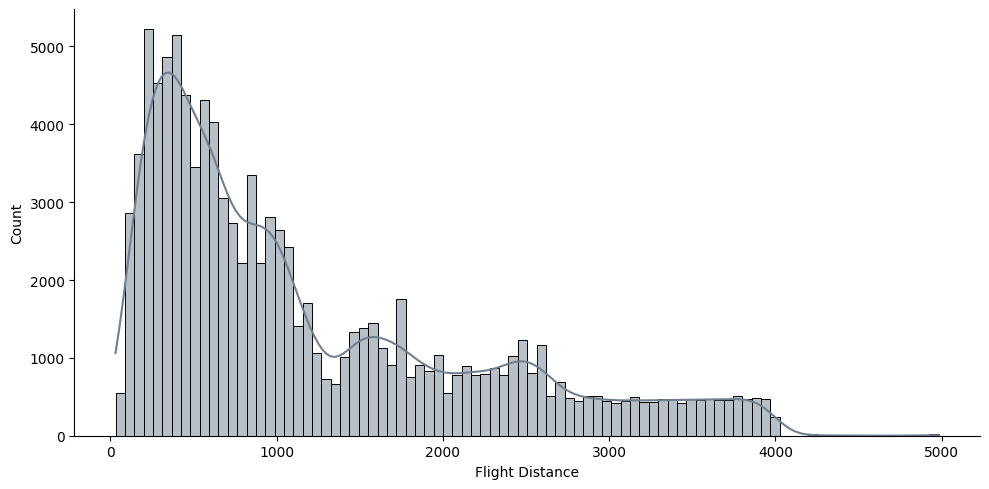

In [ ]:
#FLIGHT DISTANCE
sns.displot(df['Flight Distance'],kde=True,aspect=2, color='slategray')

La mayoria de los vuelos son de menos de 1200km

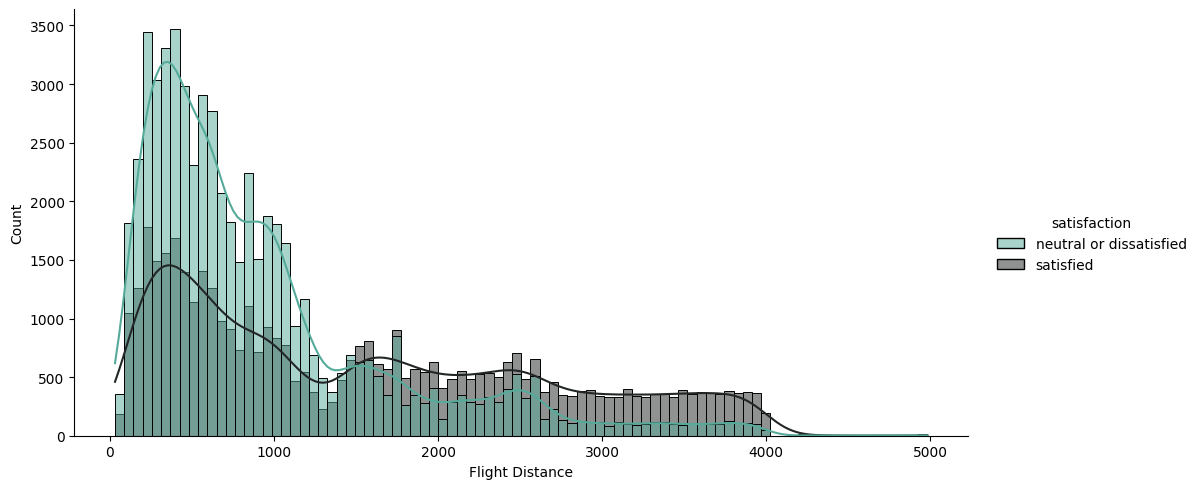

In [ ]:
#FLIGHT DISTANCE - SATISFIED
sns.displot(x=df['Flight Distance'],hue=df['satisfaction'],kde=True,aspect=2,palette='dark:#5A9_r')

Pasajeros de vuelos de más distancia están más satisfechos que lo de cortas distancias.

<ipython-input-24-f3bdb1b5321a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Departure Delay in Minutes'],color='slategray')
<ipython-input-24-f3bdb1b5321a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Arrival Delay in Minutes'],color='slategray')


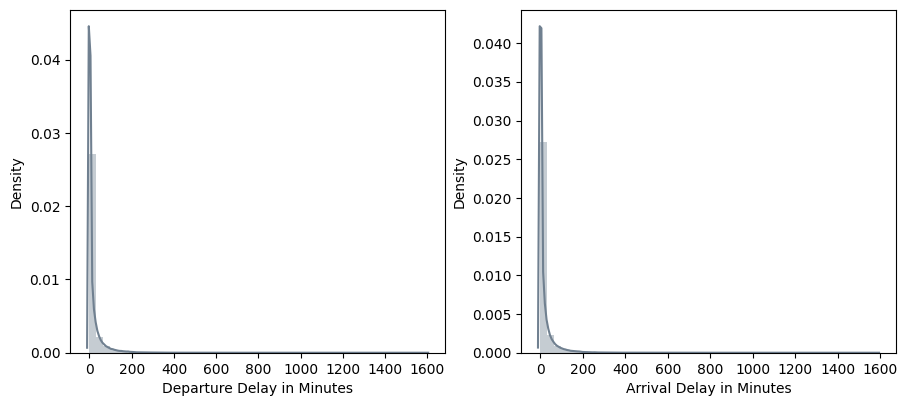

In [ ]:
#DEPARTURE DELAY IN MINUTES/
plt.figure(1,figsize=(9,4))
plt.subplot(121)
sns.distplot(df['Departure Delay in Minutes'],color='slategray')
plt.subplot(122)
sns.distplot(df['Arrival Delay in Minutes'],color='slategray')
plt.tight_layout(pad=0.5)

<ipython-input-25-e699880b5be9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Departure Delay in Minutes'],color='slategray')
<ipython-input-25-e699880b5be9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Arrival Delay in Minutes'],color='slategray')


(0.0, 250.0)

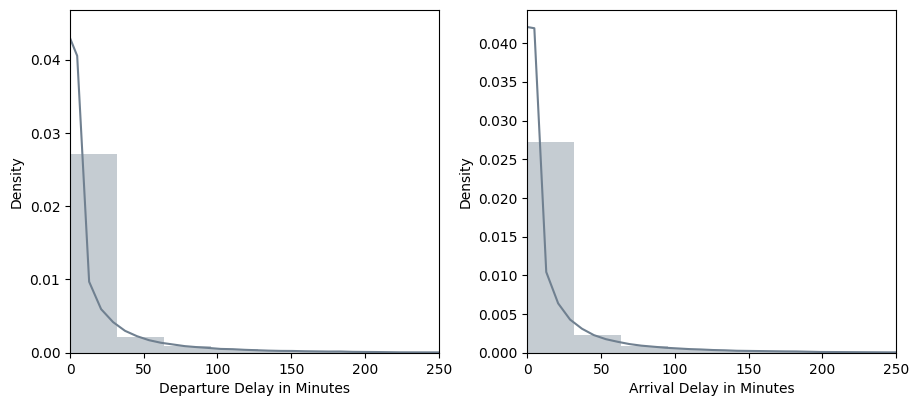

In [ ]:
plt.figure(1,figsize=(9,4))
plt.subplot(121)
sns.distplot(df['Departure Delay in Minutes'],color='slategray')
plt.xlim(0, 250)
plt.subplot(122)
sns.distplot(df['Arrival Delay in Minutes'],color='slategray')
plt.tight_layout(pad=0.5)
plt.xlim(0, 250)

La mayoría de los retrasos son de 0-25 minutos.

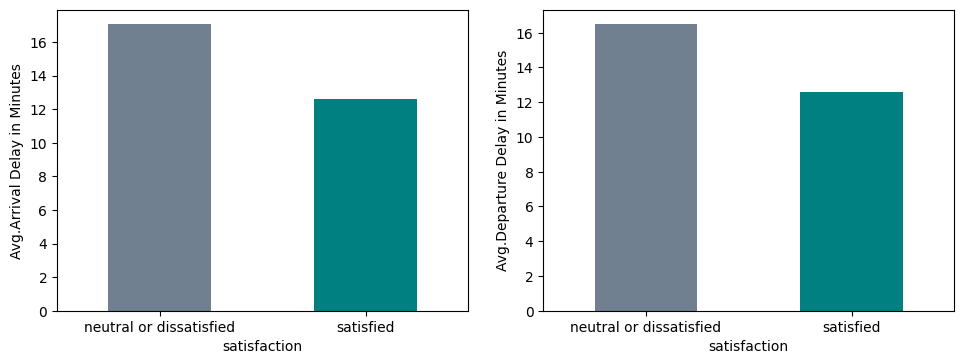

In [ ]:
#DELAYS-SATISFIED
plt.figure(1,figsize=(10,4))
plt.subplot(121)
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.ylabel('Avg.Arrival Delay in Minutes')

plt.subplot(122)
df.groupby('satisfaction')['Departure Delay in Minutes'].mean().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.ylabel('Avg.Departure Delay in Minutes')

plt.tight_layout(pad=2)

- **VARIABLES CATEGÒRICAS**

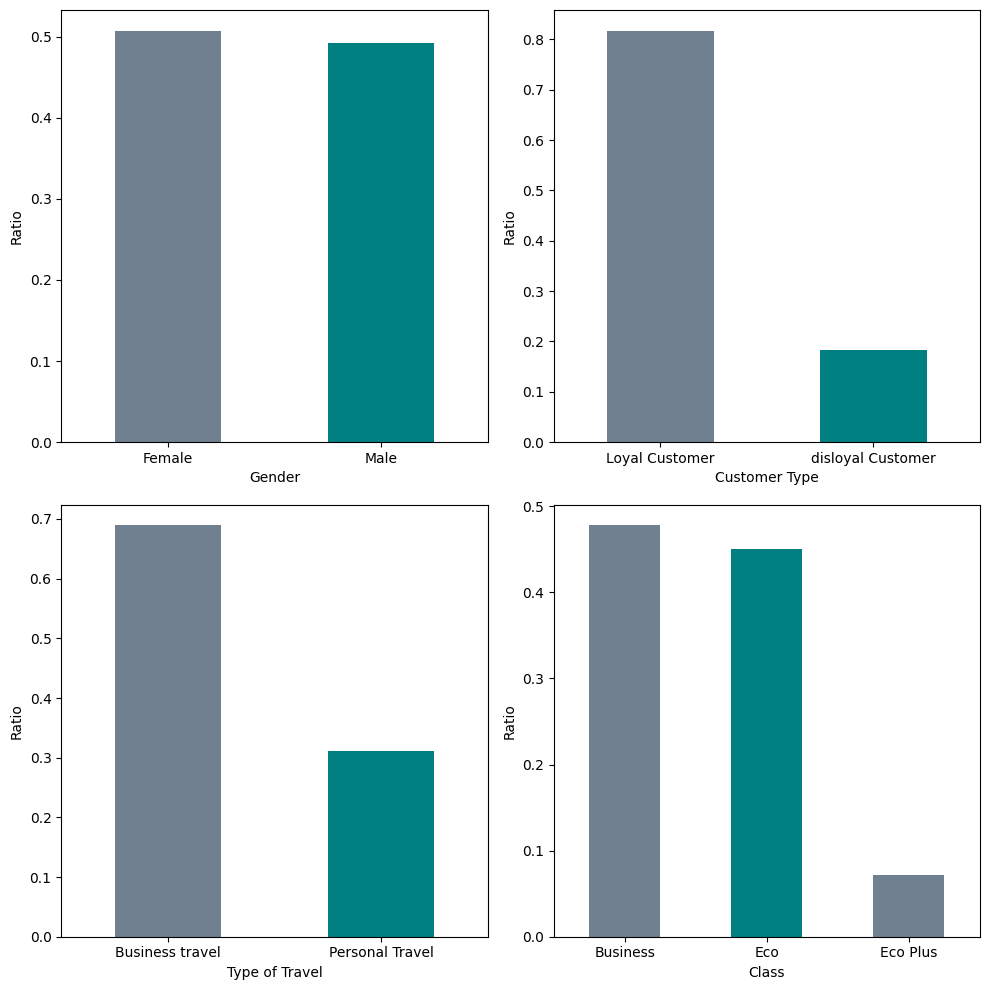

In [ ]:
plt.figure(1,figsize=(10,10))
plt.subplot(221)
df['Gender'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Ratio')

plt.subplot(222)
df['Customer Type'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Customer Type')
plt.ylabel('Ratio')

plt.subplot(223)
df['Type of Travel'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Type of Travel')
plt.ylabel('Ratio')


plt.subplot(224)
df['Class'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Class')
plt.ylabel('Ratio')


plt.tight_layout()

El 51% de los pasajeros son mujeres.  
El 82% son Loyal customer.  
El 69% viaja por propositos de negocio.  
El 48% viaja en business y el 45 en ECO class.

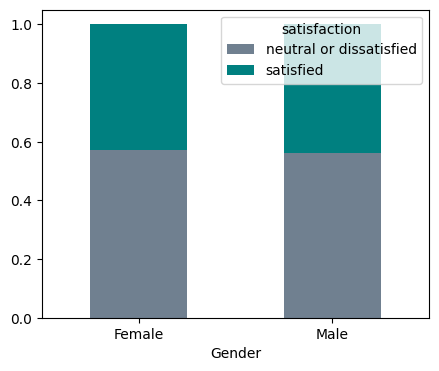

In [ ]:
#genero-satisfacción
Gender=pd.crosstab(df['Gender'],df['satisfaction'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Gender');

El 57% de las mujers fueron neutral or dissastisfied.  
El 56% de los hombres fueron neutral or dissastified

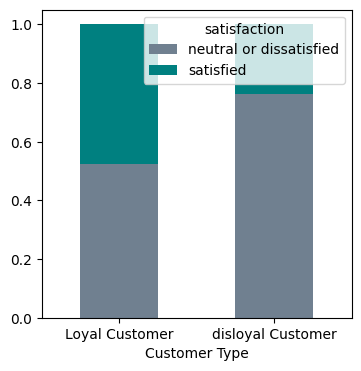

In [ ]:
#tipo de cliente-satisfacción
Customer_Type=pd.crosstab(df['Customer Type'],df['satisfaction'])
Customer_Type.div(Customer_Type.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Customer Type');

52% de Loyal customer fueron neutral or dissatisfied.  
76% disloyal customers fueron neutral or dissatisfied.

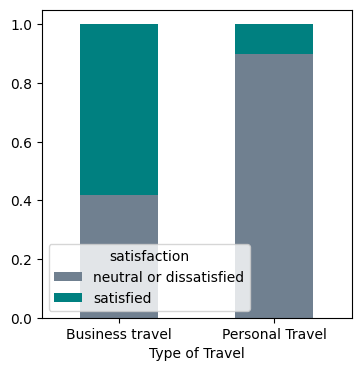

In [ ]:
#Tipo de viaje-satisfacción
Type_Travel=pd.crosstab(df['Type of Travel'],df['satisfaction'])
Type_Travel.div(Type_Travel.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(4,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Type of Travel');

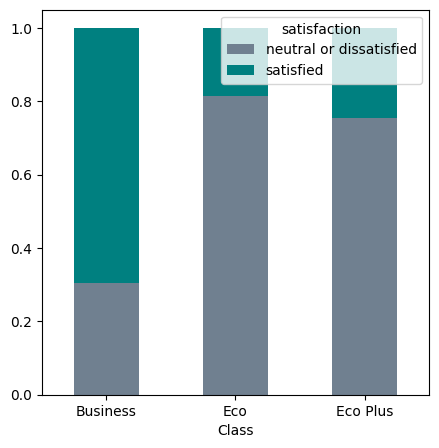

In [ ]:
#clase-satisfacción
clss=pd.crosstab(df['Class'],df['satisfaction'])
clss.div(clss.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,5),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Class');

69% Business class eran satisfied.  
 81% Eco class eran neutral or dissatisfied.  
  75% Eco Plus class eran neutral or dissatisfied.

- **CARACTERÍSTICAS ORDINALES**

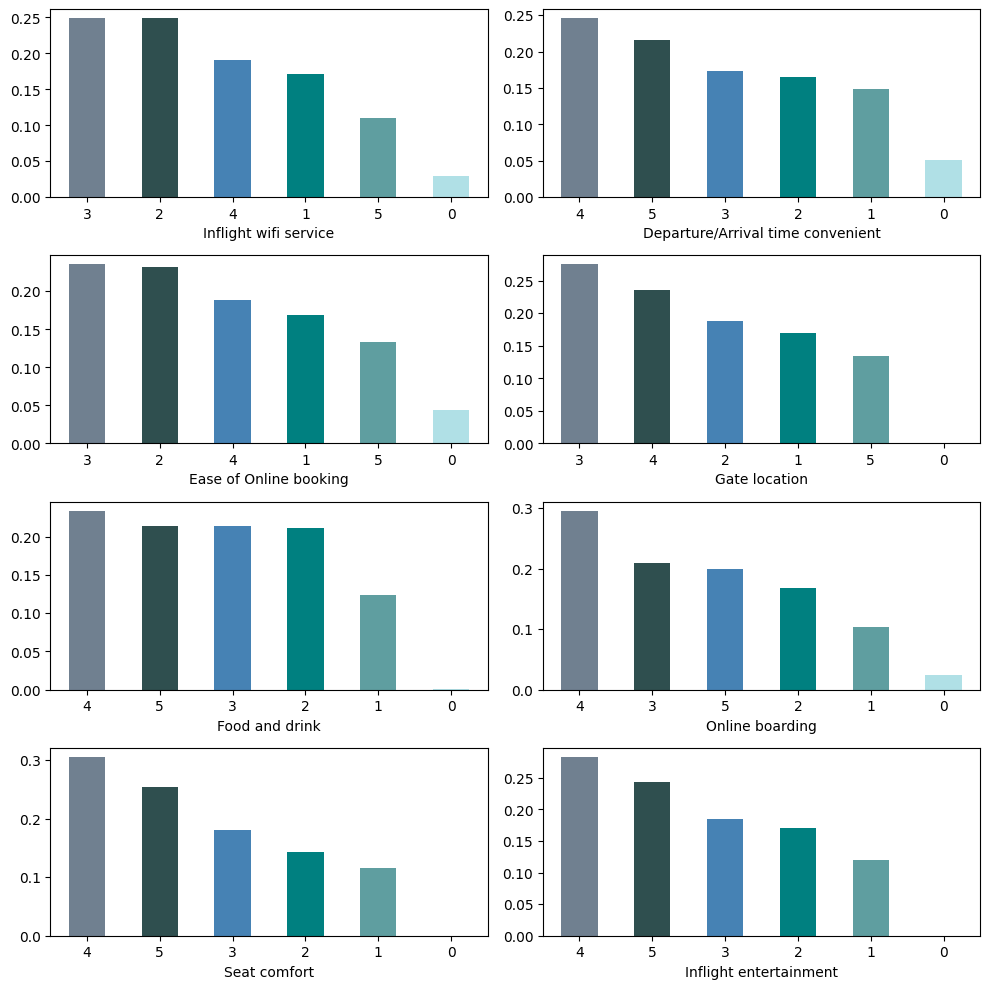

In [ ]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']
plt.figure(1,figsize=(10,10))

plt.subplot(421)
df['Inflight wifi service'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service')

plt.subplot(422)
df['Departure/Arrival time convenient'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list )
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(423)
df['Ease of Online booking'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking')

plt.subplot(424)
df['Gate location'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Gate location')

plt.subplot(425)
df['Food and drink'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Food and drink')

plt.subplot(426)
df['Online boarding'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Online boarding')

plt.subplot(427)
df['Seat comfort'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort')

plt.subplot(428)
df['Inflight entertainment'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment')


plt.tight_layout()


Aproximadamente el 25% de los pasajeros valoraron con un 3 y el 25% con un 2 el servicio de wifi a bordo.  
 El 24% de los pasajeros valoraron con un 4 la comodidad de la hora de salida/llegada y el 21% de los pasajeros valoraron con un 5.  
  Aproximadamente el 23% de los pasajeros valoraron con un 3 la facilidad de reserva en línea y el 23% con un 2.  
   El 27,5% de los pasajeros valoraron con un 3 la ubicación de la puerta de embarque.  
    El 23% de los pasajeros valoraron con un 4 el servicio de comida y bebida.  
     El 30% de los pasajeros valoraron con un 4 la comodidad de los asientos.  
        
   Aproximadamente el 28% de los pasajeros valoraron con un 4 el entretenimiento a bordo.

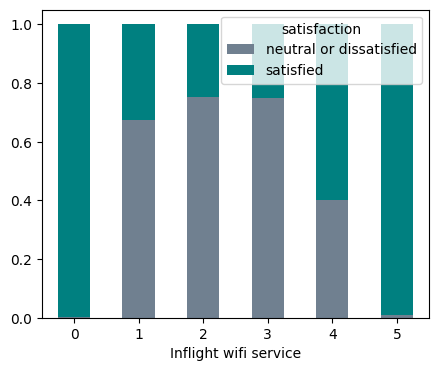

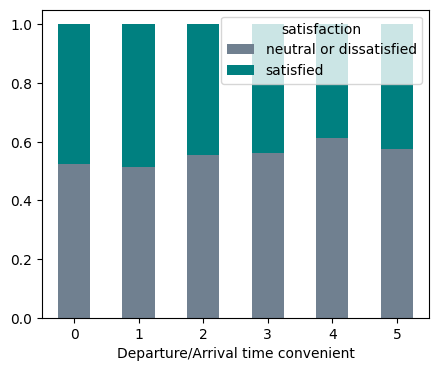

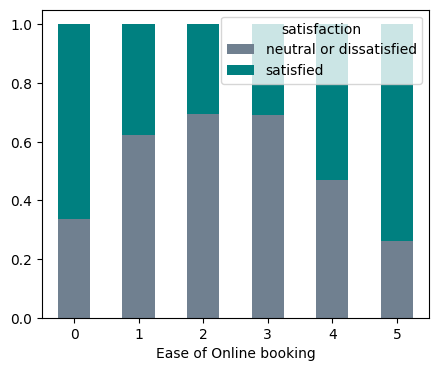

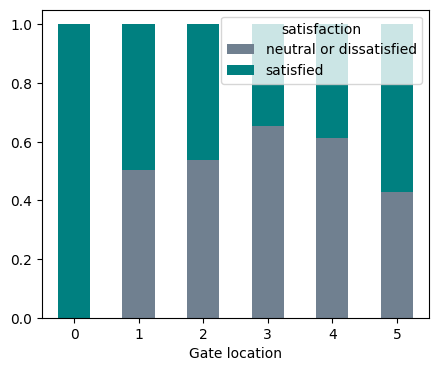

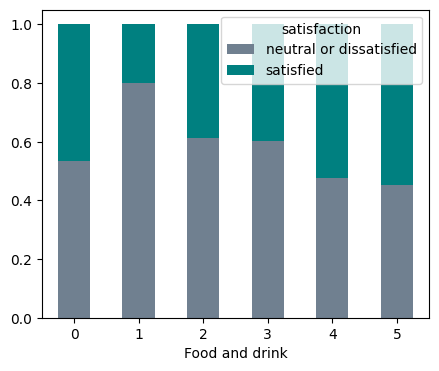

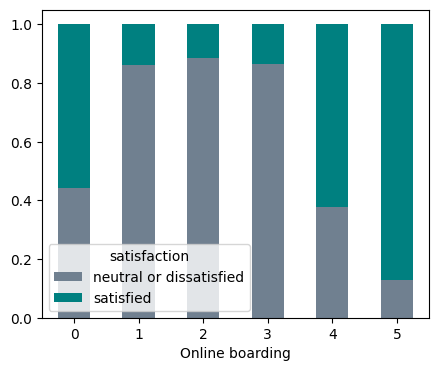

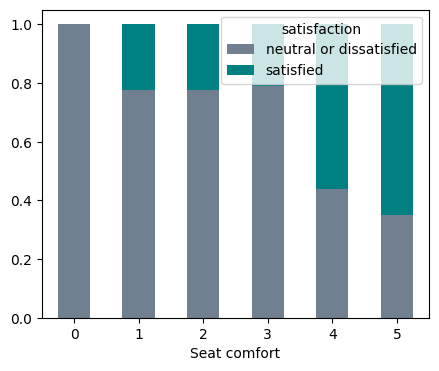

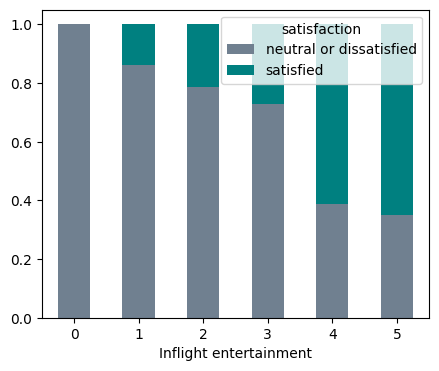

In [ ]:
IW=pd.crosstab(df['Inflight wifi service'],df['satisfaction'])
IW.div(IW.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service');

DA=pd.crosstab(df['Departure/Arrival time convenient'],df['satisfaction'])
DA.div(DA.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient');

EO=pd.crosstab(df['Ease of Online booking'],df['satisfaction'])
EO.div(EO.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking');

GL=pd.crosstab(df['Gate location'],df['satisfaction'])
GL.div(GL.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Gate location');

FD=pd.crosstab(df['Food and drink'],df['satisfaction'])
FD.div(FD.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Food and drink');

OB=pd.crosstab(df['Online boarding'],df['satisfaction'])
OB.div(OB.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Online boarding');

SC=pd.crosstab(df['Seat comfort'],df['satisfaction'])
SC.div(SC.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort');

IE=pd.crosstab(df['Inflight entertainment'],df['satisfaction'])
IE.div(IE.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment');

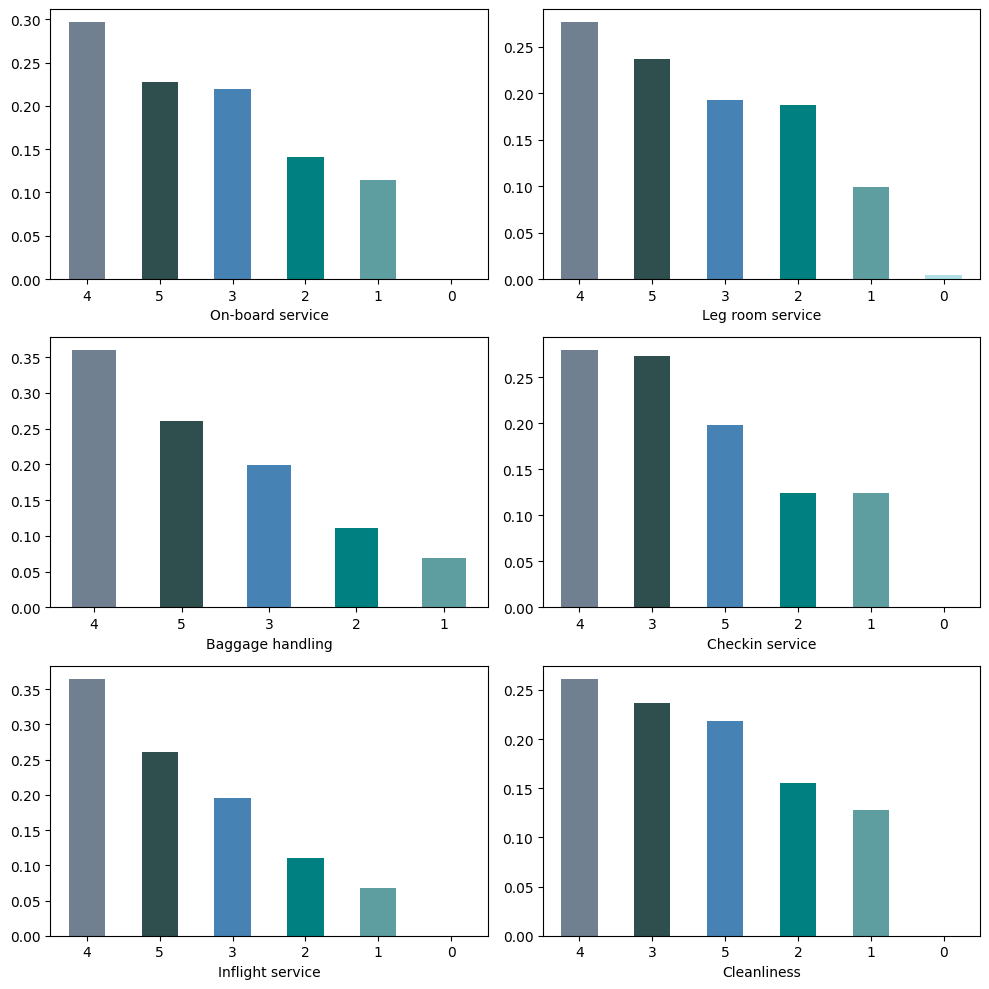

In [ ]:
plt.figure(1,figsize=(10,10))
plt.subplot(321)
df['On-board service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('On-board service')

plt.subplot(322)
df['Leg room service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Leg room service')

plt.subplot(323)
df['Baggage handling'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Baggage handling')

plt.subplot(324)
df['Checkin service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Checkin service')

plt.subplot(325)
df['Inflight service'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight service')

plt.subplot(326)
df['Cleanliness'].value_counts(normalize=True,dropna=True).plot.bar(color=color_list)
plt.xticks(rotation = 360)
plt.xlabel('Cleanliness')


plt.tight_layout()

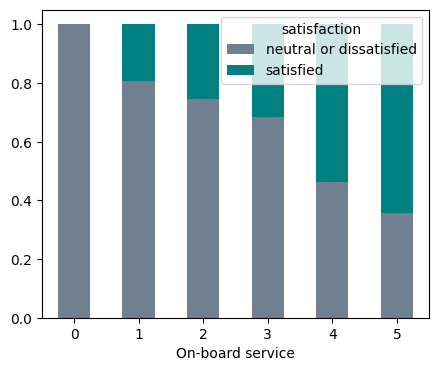

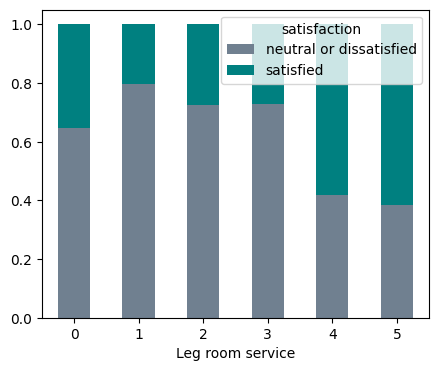

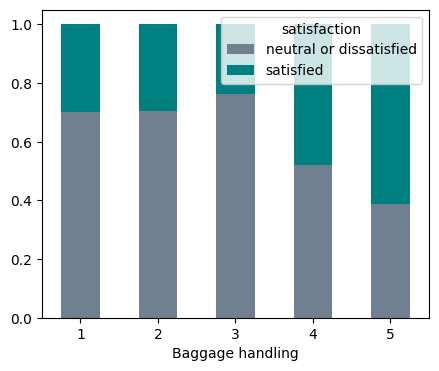

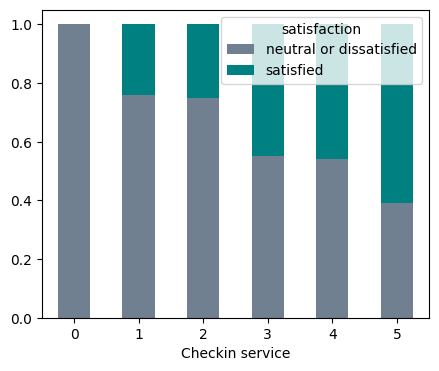

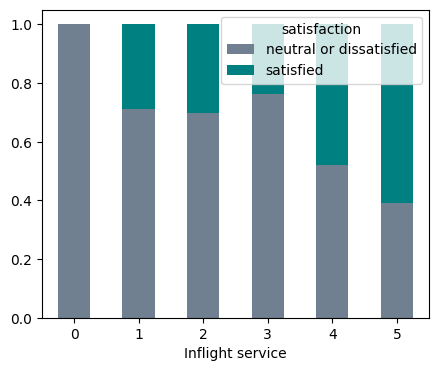

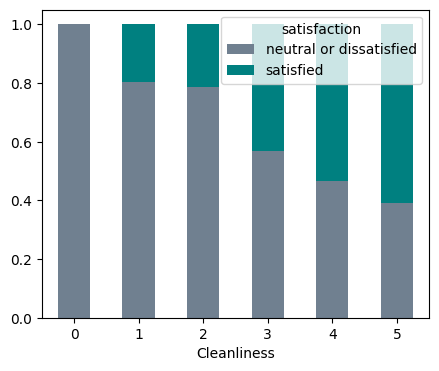

In [ ]:
BS=pd.crosstab(df['On-board service'],df['satisfaction'])
BS.div(BS.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('On-board service');

LR=pd.crosstab(df['Leg room service'],df['satisfaction'])
LR.div(LR.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Leg room service');

BH=pd.crosstab(df['Baggage handling'],df['satisfaction'])
BH.div(BH.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Baggage handling');

CS=pd.crosstab(df['Checkin service'],df['satisfaction'])
CS.div(CS.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Checkin service');

IS=pd.crosstab(df['Inflight service'],df['satisfaction'])
IS.div(IS.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Inflight service');

CL=pd.crosstab(df['Cleanliness'],df['satisfaction'])
CL.div(CL.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(5,4),color = ['slategray','teal'])
plt.xticks(rotation = 360)
plt.xlabel('Cleanliness');


- **CORRELACIÓN**

<ipython-input-37-6699ee63525d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


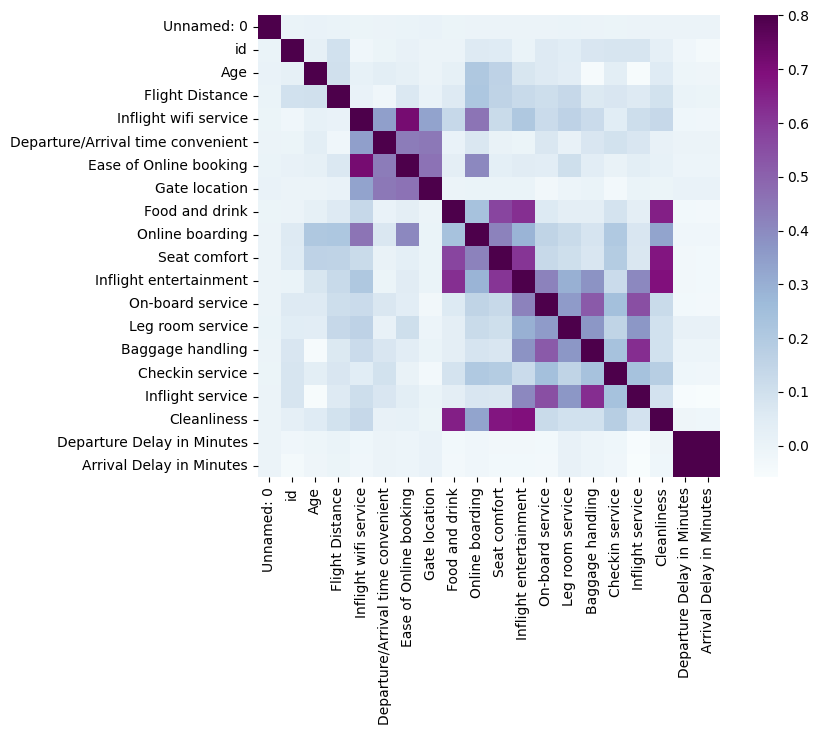

In [ ]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Inflight wifi service y ease of online booking están muy correlacionados entre sí.  
Departure Delay in mins y Arrival delay in mins están muy correlacionados entre sí.  
 Cleanliness, food and drink, seat comfort Y inflight entertainment están correlacionados entre sí en un 65% aproximadamente.  
  Baggage handling Y on-board service están correlacionados entre sí en un 60% aproximadamente.

- **OUTLIERS**

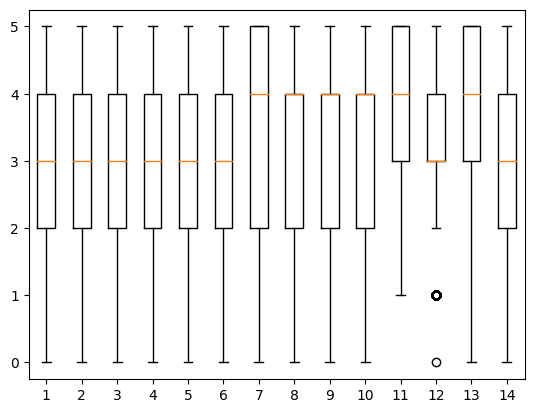

In [ ]:
#CARACTERÍSTICAS ORDINALES
plt.boxplot(df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]);

Observamos outliers en el 12, que es checking service

In [ ]:
df['Checkin service'].value_counts()

4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64

Lo podremos eliminar en el data preprocesing

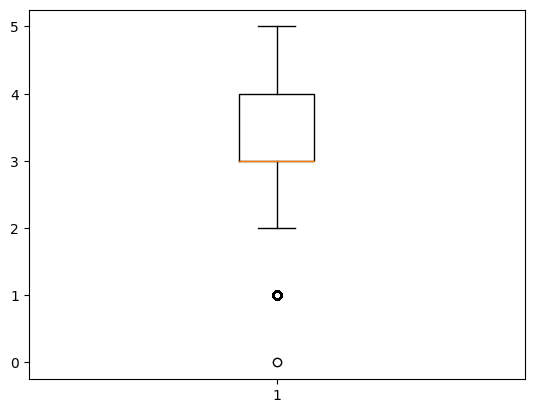

In [ ]:
plt.boxplot(df['Checkin service']);

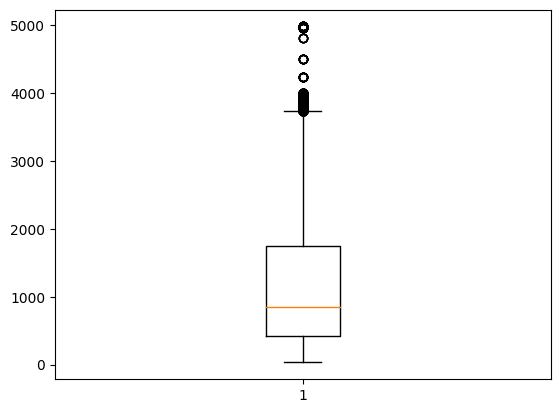

In [ ]:
plt.boxplot(df['Flight Distance']);

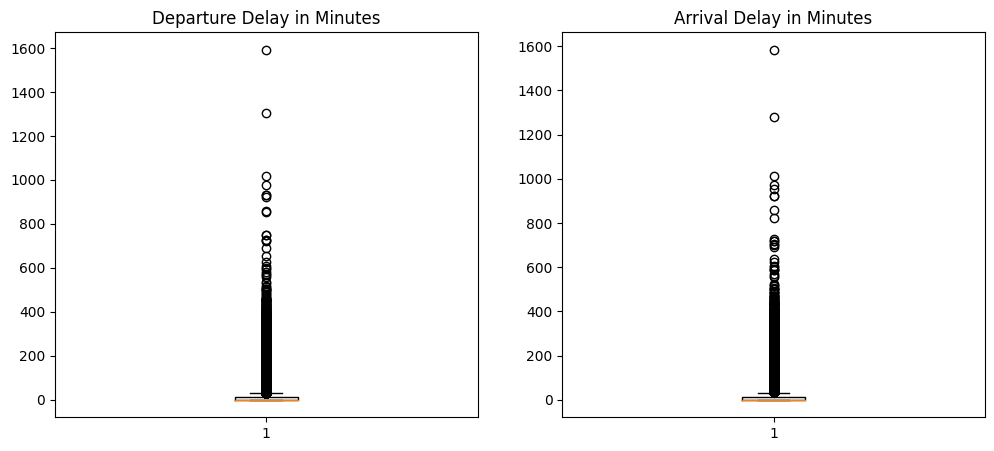

In [ ]:
plt.figure(1,figsize=(12,5))
plt.subplot(121)
plt.boxplot(df['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes')
plt.subplot(122)
plt.boxplot(df['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes');

# Ingenieria de caracteristicas

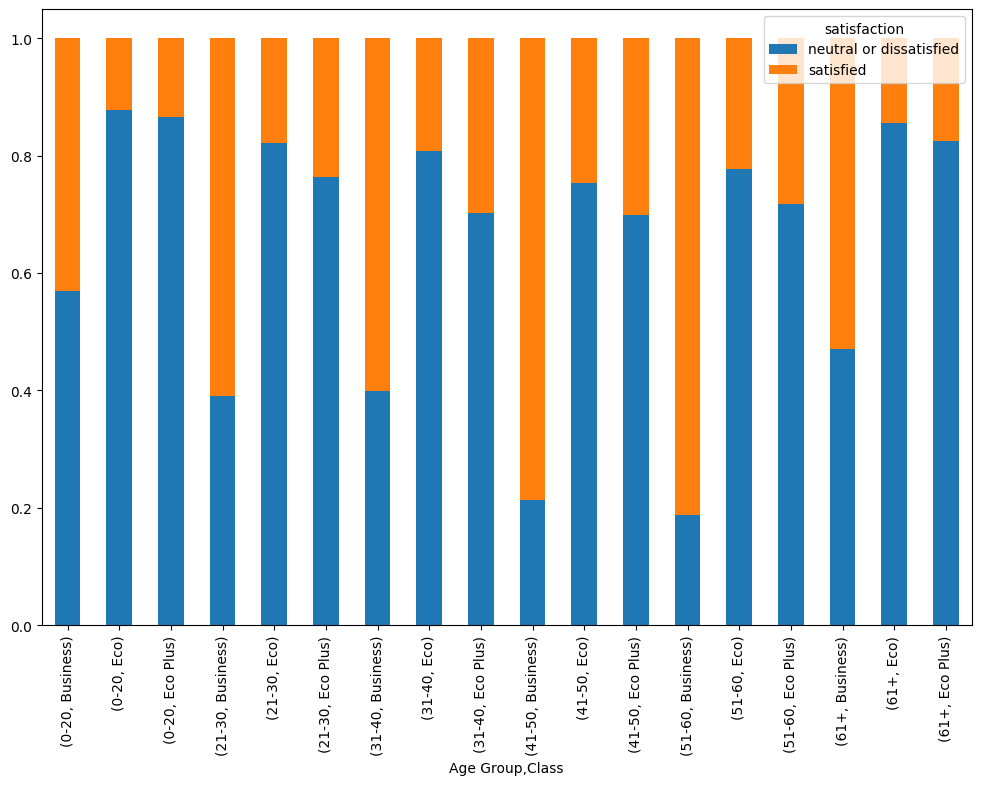

In [ ]:
# Crear la columna 'Age Group' en base a la edad
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Crear el gráfico de barras apilado
age_class_satisfaction = df.groupby(['Age Group', 'Class', 'satisfaction']).size().unstack(fill_value=0)

# Normalizar los valores para obtener proporciones
age_class_satisfaction = age_class_satisfaction.div(age_class_satisfaction.sum(axis=1), axis=0)

# Crear el gráfico de barras apilado
ax = age_class_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 8))
